# CATEGORY AND PURPOSE BASED ANALYSIS

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from datetime import datetime

In [18]:
# Load the Uber dataset
df=pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


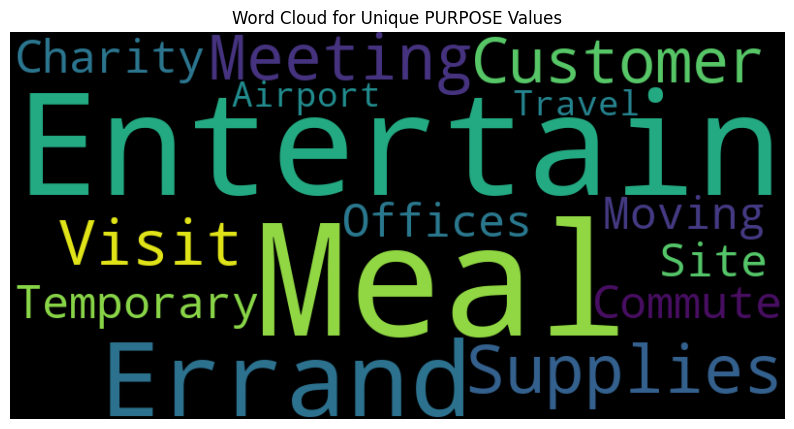

In [32]:
#Word cloud for unique PURPOSE values
# Ensure all values in 'PURPOSE' are treated as strings
df['PURPOSE'] = df['PURPOSE'].astype(str)

# Join all unique PURPOSE values as a single string
purpose_text = ' '.join(df['PURPOSE'].unique())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(purpose_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unique PURPOSE Values')
plt.show()

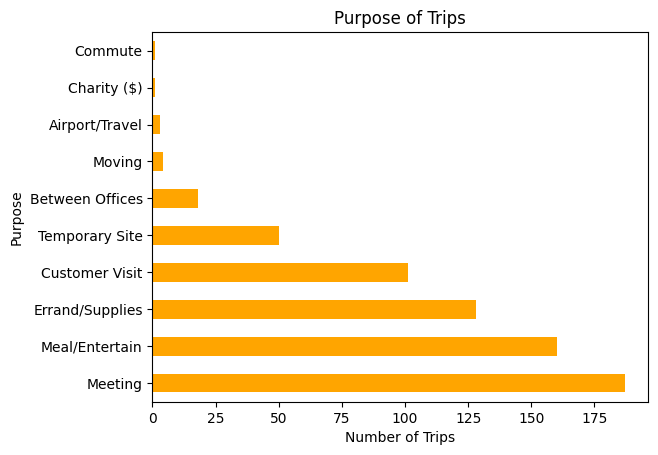

In [19]:
# Horizontal Bar Chart for the PURPOSE column
purpose_counts = df['PURPOSE'].value_counts()
purpose_counts.plot(kind='barh', color='orange')
plt.title("Purpose of Trips")
plt.xlabel("Number of Trips")
plt.ylabel("Purpose")
plt.show()
# Insight: Highlights the most common purposes for trips

In [43]:
# Treemap for top 10 purposes
purpose_counts = df['PURPOSE'].value_counts().head(10)
fig = px.treemap(purpose_counts, path=[purpose_counts.index], values=purpose_counts)
fig.update_layout(title="Top 10 Purposes Treemap")
fig.show()

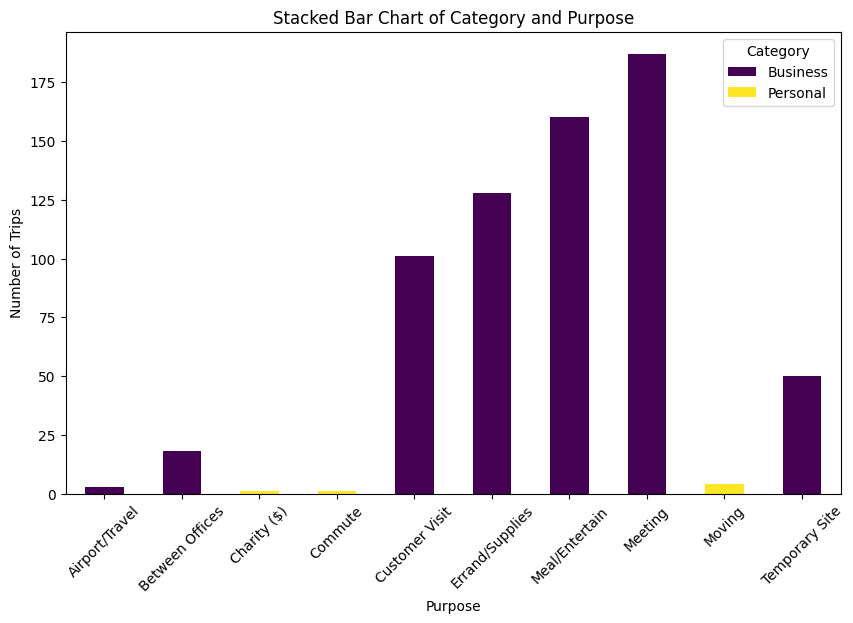

In [20]:
# Stacked Bar Chart to Compare CATEGORY and PURPOSE
purpose_category = pd.crosstab(df['PURPOSE'], df['CATEGORY'])
purpose_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked Bar Chart of Category and Purpose")
plt.xlabel("Purpose")
plt.ylabel("Number of Trips")
plt.legend(title="Category")
plt.xticks(rotation=45) 
plt.show()
# Insight: Shows how purposes are split between business and personal rides.

In [ ]:
# CATEGORY and PURPOSE overlap with a bubble chart
category_purpose_overlap = pd.crosstab(df['CATEGORY'], df['PURPOSE'])
fig = go.Figure(data=[go.Scatter(
    x=category_purpose_overlap.columns,
    y=category_purpose_overlap.index,
    mode='markers',
    marker=dict(size=category_purpose_overlap.values.flatten() * 0.5, color=category_purpose_overlap.values.flatten(), showscale=True)
)])
fig.update_layout(title='Bubble Chart for CATEGORY and PURPOSE Overlap')
fig.show()

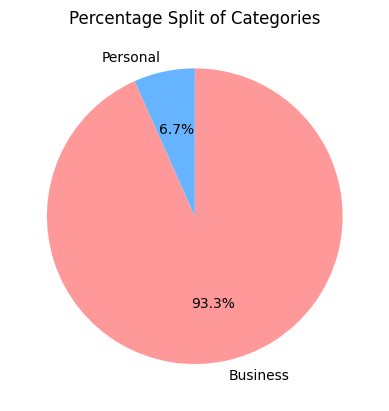

In [21]:
# Percentage Split of CATEGORY with a Pie Chart
category_counts = df['CATEGORY'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'], startangle=90, counterclock=False )
plt.title("Percentage Split of Categories")
plt.ylabel("")  # Removes default ylabel
plt.show()
# Insight: Shows the percentage share of business and personal trips.

In [30]:
# Sunburst Chart Showing CATEGORY and PURPOSE
import plotly.express as px

# Clean the data by removing NaN or invalid entries
df = df.dropna(subset=['CATEGORY', 'PURPOSE'])

# Ensure both CATEGORY and PURPOSE columns are categorical
df['CATEGORY'] = df['CATEGORY'].astype('category')
df['PURPOSE'] = df['PURPOSE'].astype('category')

fig = px.sunburst(df, path=['CATEGORY', 'PURPOSE'], title="Sunburst Chart of Category and Purpose")  
fig.show()
# Insight: Displays hierarchical relationships between CATEGORY and PURPOSE.

C:\Users\Suraj Patil\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Suraj Patil\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



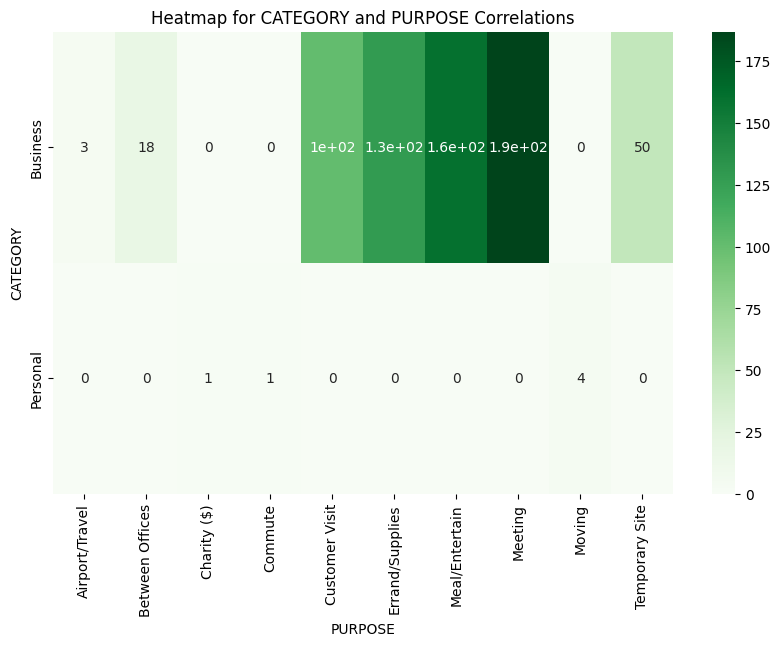

In [42]:
# Heatmap showing CATEGORY and PURPOSE correlations
category_purpose_corr = pd.crosstab(df['CATEGORY'], df['PURPOSE'])
plt.figure(figsize=(10, 6))
sns.heatmap(category_purpose_corr, annot=True, cmap='Greens')
plt.title('Heatmap for CATEGORY and PURPOSE Correlations')
plt.show()

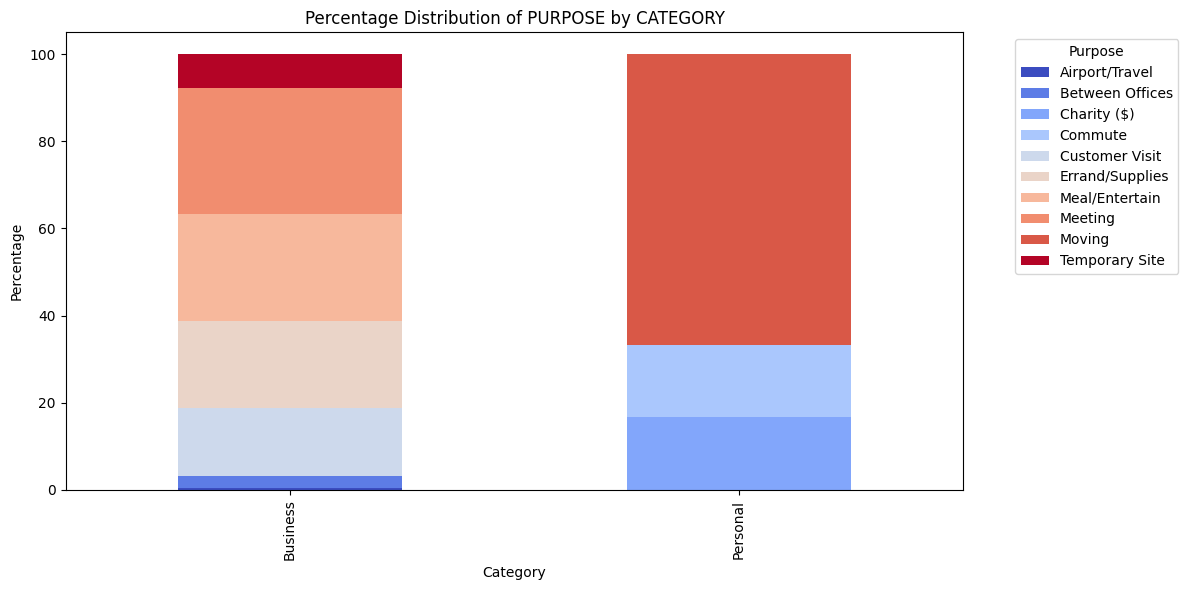

In [45]:
# Plot the percentage distribution of PURPOSE within each CATEGORY
# Create the crosstab for CATEGORY and PURPOSE
category_purpose = pd.crosstab(df['CATEGORY'], df['PURPOSE'])

# Calculate the percentage distribution of PURPOSE within each CATEGORY
category_purpose_percentage = category_purpose.div(category_purpose.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
category_purpose_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Percentage Distribution of PURPOSE by CATEGORY")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.legend(title="Purpose", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
# Insight: 'Meal/Entertain' is more prevalent in personal trips compared to business trips.

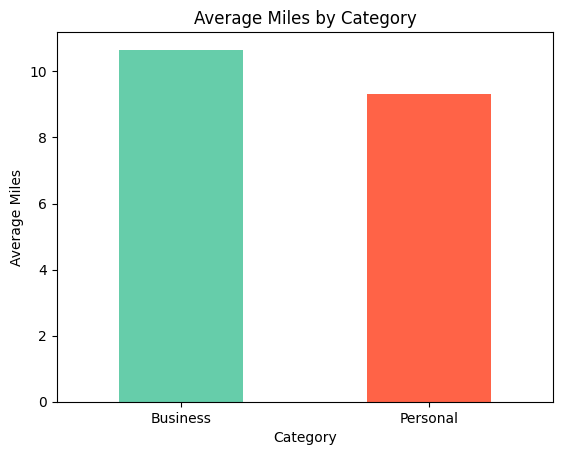

In [6]:
# Average MILES by CATEGORY Bar Plot
avg_miles = df.groupby('CATEGORY')['MILES'].mean()
avg_miles.plot(kind='bar', color=['#66CDAA', '#FF6347'])
plt.title("Average Miles by Category")
plt.xlabel("Category")
plt.ylabel("Average Miles")
plt.xticks(rotation=0)
plt.show()

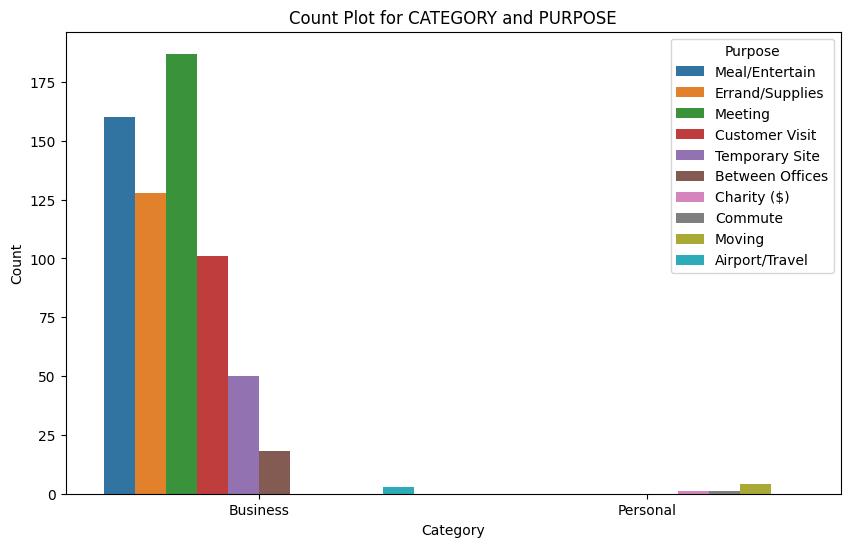

In [49]:
# Create a count plot for CATEGORY and PURPOSE
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', hue='PURPOSE', data=df)
plt.title('Count Plot for CATEGORY and PURPOSE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Purpose')
plt.show()